<a href="https://colab.research.google.com/github/igrosny/libros/blob/master/IMLP/Capitulo_1_Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning with Python
## Capitulo 1: Introduccion

### Numpy

Contiene funciones para arreglo multidimensionales y algebra lineal

In [1]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

### SciPy

Algebra lineal avanzada, distribuciones estadisticas


In [2]:
from scipy import sparse

# Creaer un arreglo 2d con la diagonal en 1 y el resto 0 (la matriz identidad)
identidad = np.eye(4)

print("Arreglo Numpy:\n%s" % identidad)

# Convertir el arreglo numpy en una matriz sparse scipy en formato CSR
# donde solo los valores != 0 son guardados

sparse_matriz = sparse.csr_matrix(identidad)
print("\nScipy sparse CSR matriz:\n%s" % sparse_matriz)

Arreglo Numpy:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Scipy sparse CSR matriz:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Matplotlib

Libreria para hacer graficos

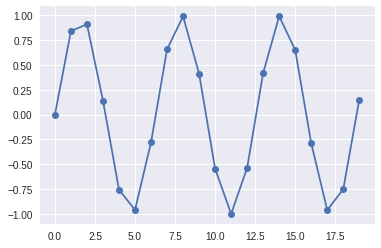

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generar una secuencia de enteros
x = np.arange(20)

# Crear un segundo arreglo usando la funcion seno
y = np.sin(x)

# la funcion plot genera un grafico de lineal de unarreglo contra el otro
plt.plot(x, y, marker="o")

### Pandas
Libreria para manejo de datos construy los datos en una estructura llamada Dataframe

In [4]:
import pandas as pd

# Crear un simple dataset de personas
data = {'Name': ["John","Anna","Peter","Linda"],
       'Location': ["New York","Paris","Berlin","London"],
       'Age': [24,13,52,33]}

data_pandas = pd.DataFrame(data)
data_pandas

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,52,Berlin,Peter
3,33,London,Linda


## La primer aplicacion: Clasificando flores

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.keys()

print(iris['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# esta es la clasificacion o el tipo de label
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Estos son los features
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# La data esta aca
print(type(iris['data']))
print(iris['data'].shape)
iris['data'][:5]

<class 'numpy.ndarray'>
(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
# Y por ultimo esta el target/label
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Entrenando y evaluando la data
No podemos evaluar el modelo con la misma data con la qu entreno ya siempre corre el riesgo de recorda por eso la dividimos en dos grupos

* training data
* test data


In [10]:
from sklearn.model_selection import train_test_split

# train_test_split separa el 75% de los datos
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], random_state=0)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


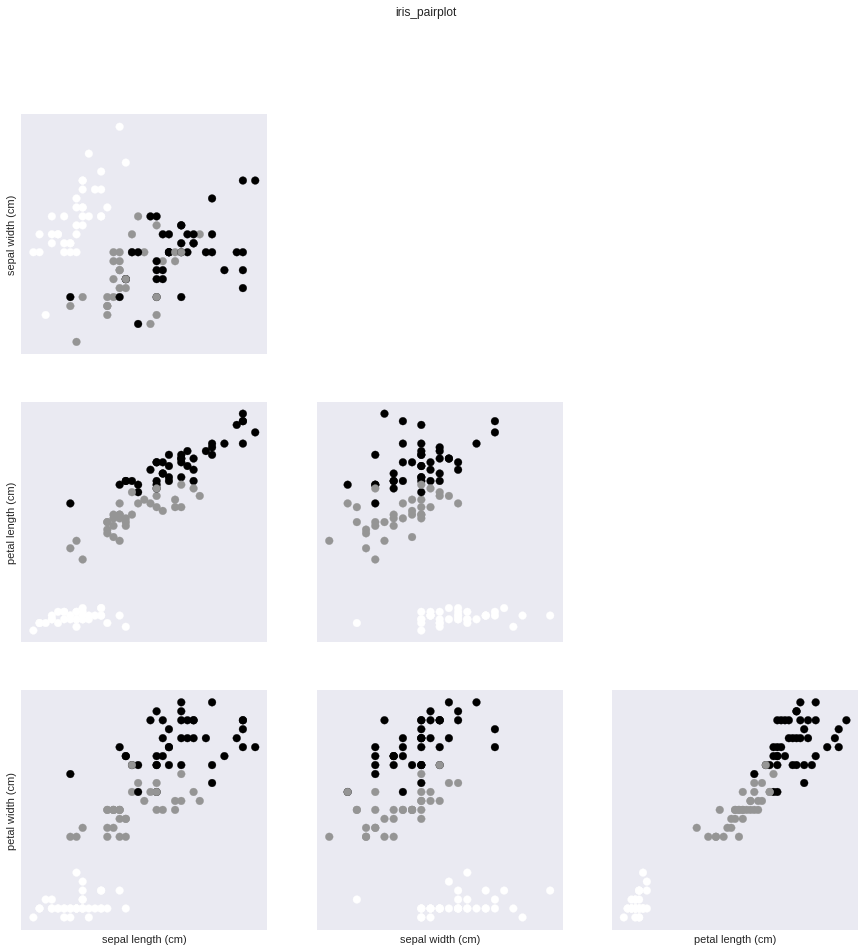

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
  for j in range(3):
    ax[i, j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=60)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())
    if i == 2:
      ax[i, j].set_xlabel(iris['feature_names'][j])
    if j == 0:
      ax[i, j].set_ylabel(iris['feature_names'][i+1])
    if j > i:
      ax[i, j].set_visible(False)

## Construyendo le primer modelo: K Neares Neighbors

El modelo consiste en guardar el el set de entrenamiento, y el nuevo data point sera el mas proximo a los k mas proximos

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                    metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                    weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Haciendo predicciones


In [17]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

prediction = knn.predict(X_new)
prediction

array([0])

### Evaluando el modelo
Podemos medir como funciona el modelo calculando el accuracy

In [18]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [19]:
knn.score(X_test, y_test)

0.9736842105263158